# Lupton RGB Cutouts

This notebook illustrates how to create a Lupton RGB cutout image from single-band cutout images. For simplicity, we are using single-band cutouts generated by [Single-Band Cutouts example notebook](http://astroimtools.readthedocs.io/en/latest/astroimtools/notebooks/make_cutouts.html).

**NOTE:** Lupton RGB image is constructed using function from [John Parejko's Astropy branch](https://github.com/parejkoj/astropy/tree/luptonRGB).

## Create an RGB Image from 3 Bands

Define the single-band cutout images to combine:

In [1]:
from astropy.io import fits

image_r = fits.getdata('jwst_nircam_f200w_cutouts/MOS_1_010_133_jwst_nircam_f200w_cutout.fits')
image_g = fits.getdata('hst_wfc3ir_f160w_cutouts/MOS_1_184_053_hst_wfc3ir_f160w_cutout.fits')
image_b = fits.getdata('jwst_nircam_f115w_cutouts/MOS_1_359_097_jwst_nircam_f115w_cutout.fits')

Make the RGB image:

In [2]:
#from astropy.visualization import lupton_rgb  # Future
from astroimtools import lupton_rgb

# Additional fileName keyword saves the image as well.
minval = min(image_r.min(), image_g.min(), image_b.min())
maxval = max(image_r.max(), image_g.max(), image_b.max())
image = lupton_rgb.makeRGB(image_r, image_g, image_b, minimum=minval, dataRange=maxval)

Display the result:

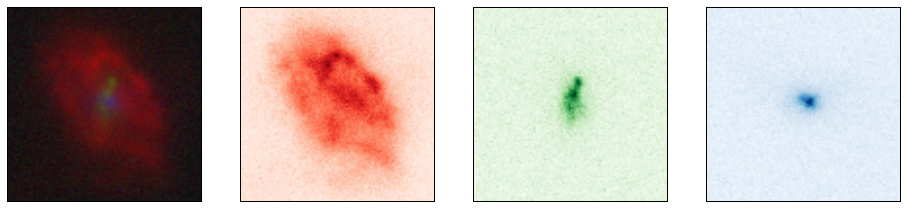

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(142)
ax2 = fig.add_subplot(143)
ax3 = fig.add_subplot(144)
ax4 = fig.add_subplot(141)

ax1.imshow(image_r, cmap='Reds')
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.imshow(image_g, cmap='Greens')
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3.imshow(image_b, cmap='Blues')
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)

ax4.imshow(image)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)

In [4]:
print(image.shape)

(100, 100, 3)


## Create an RGB Image from 2 Bands

If you simply want to create an RGB image from 2 instead of 3 bands, simply set the unused color to `None` instead of assigning it image data. The example below only use R and B colors:

In [5]:
image2 = lupton_rgb.makeRGB(image_r, None, image_b, minimum=minval, dataRange=maxval)

Display the results:

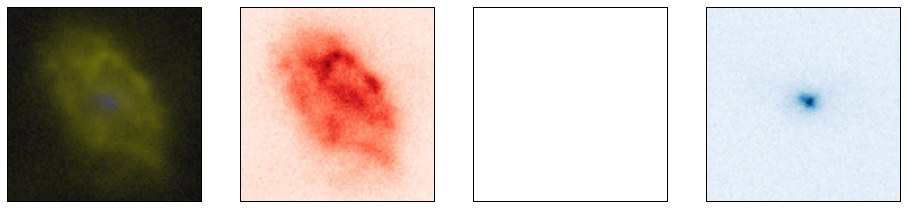

In [6]:
fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(142)
ax2 = fig.add_subplot(143)
ax3 = fig.add_subplot(144)
ax4 = fig.add_subplot(141)

ax1.imshow(image_r, cmap='Reds')
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

# Display dummy data for G since it is not used
ax2.imshow(image_g * 0, cmap='gray_r')
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3.imshow(image_b, cmap='Blues')
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)

ax4.imshow(image2)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)

In [7]:
print(image2.shape)

(100, 100, 3)


## Example using GOODS-S Data

This sub-section shows usage of the same tools above but with real [CANDELS GOODS-S Data Release](http://candels.ucolick.org/data_access/GOODS-S.html). The data shown here is a subset of Deep JH subregion from `gsd01` epoch. The cutouts were pre-made and included in the notebook's `data` directory.

In [8]:
image_r = fits.getdata('data/CANDELS_GDS_F160W_J033236.06-274559.1_hst_wfc3ir_f160w_cutout.fits')
image_g = fits.getdata('data/CANDELS_GDS_F160W_J033236.06-274559.1_hst_wfc3ir_f125w_cutout.fits')
image_b = fits.getdata('data/CANDELS_GDS_F160W_J033236.06-274559.1_hst_acs_f814w_cutout.fits')

In [9]:
# Limits are adjusted to emphasize the R-band.
minval = 0.0
maxval = image_r.max()

# Make RGB image.
image = lupton_rgb.makeRGB(image_r, image_g, image_b, minimum=minval, dataRange=maxval)

Display the results:

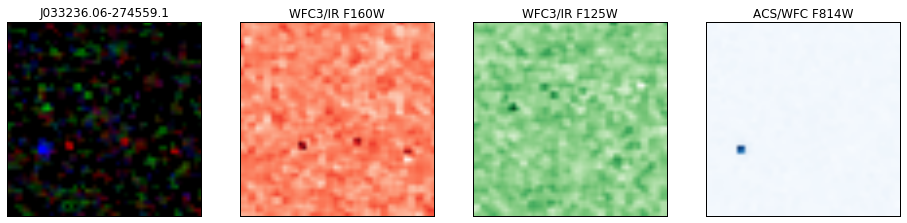

In [10]:
fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(142)
ax2 = fig.add_subplot(143)
ax3 = fig.add_subplot(144)
ax4 = fig.add_subplot(141)

ax1.imshow(image_r, cmap='Reds')
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax1.set_title('WFC3/IR F160W')

ax2.imshow(image_g, cmap='Greens')
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax2.set_title('WFC3/IR F125W')

ax3.imshow(image_b, cmap='Blues')
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
ax3.set_title('ACS/WFC F814W')

ax4.imshow(image)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)
ax4.set_title('J033236.06-274559.1')